In [1]:
import os
import tensorflow as tf

In [2]:
input_img_size = (128,128)
input_shape = (128,128,3)

In [3]:
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
)

In [4]:
train_gen = tf_generator.flow_from_directory(
    os.getcwd()+"/cats_and_dogs_filtered/train",
    target_size=input_img_size,
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
)

test_gen = tf_generator.flow_from_directory(
    "/Users/tharhtet/Documents/test2/cats_and_dogs_filtered/train",
    target_size=input_img_size,
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
)

Found 2752 images belonging to 2 classes.
Found 2752 images belonging to 2 classes.


0.0


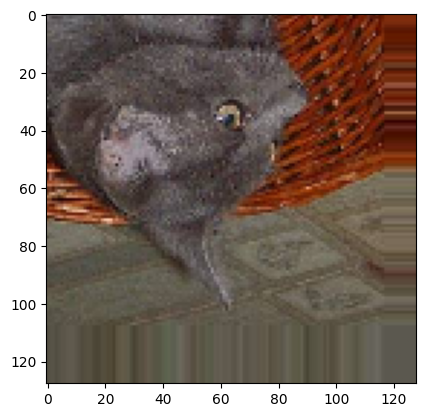

In [5]:
import matplotlib.pyplot as plt

test_label = None
test_img = None
for img,label in train_gen:
    test_img = img
    test_label = label
    break

print(test_label[0])
plt.imshow(test_img[0])

In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(1,activation='softmax')
    
])



/Users/tharhtet/.local/share/virtualenvs/test2-jnp9vXya/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-12 10:46:54.175928: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-12 10:46:54.175965: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-12 10:46:54.175981: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-12 10:46:54.176006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-12 10:46:54.176029: I tensorflow/core/common_runtime/pluggable_

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(train_gen,epochs=2, validation_data=test_gen,verbose=1)

Epoch 1/2


/Users/tharhtet/.local/share/virtualenvs/test2-jnp9vXya/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/Users/tharhtet/.local/share/virtualenvs/test2-jnp9vXya/lib/python3.10/site-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
2025-01-12 10:46:55.535699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.5019 - loss: 2.5638 - val_accuracy: 0.5036 - val_loss: 0.6932
Epoch 2/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.4960 - loss: 0.6950 - val_accuracy: 0.5036 - val_loss: 0.6913


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[1.]
0.0


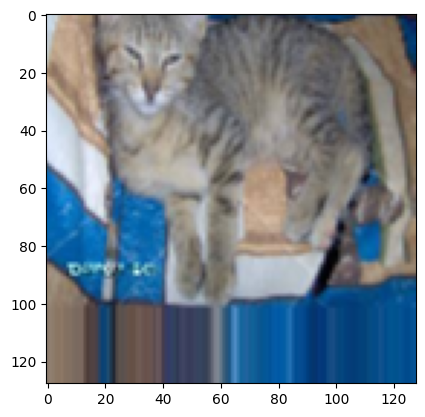

In [12]:
import numpy as np
index = 1
sample_label = test_label[index]
sample_img = test_img[index]

_pred = model.predict(test_img)[index]
print(_pred)

print(sample_label)
plt.imshow(sample_img)